In [1]:
## Import Libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn  as sns

In [2]:
## Read dataset
df = pd.read_csv("Salary_Data.csv")

In [3]:
## show dataset first 5 rows
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
df['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [35]:
## dataset shape
df.shape

(30, 2)

In [4]:
## dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<h2>Clean Dataset</h2>

In [5]:
## Cheak Null Values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Observatioin
Dataset haven't any null values

In [6]:
## Cheak Duplicated Values
print(df.duplicated().sum())

0


## Observatioin
Dataset haven't any Duplicated values

<Axes: ylabel='Salary'>

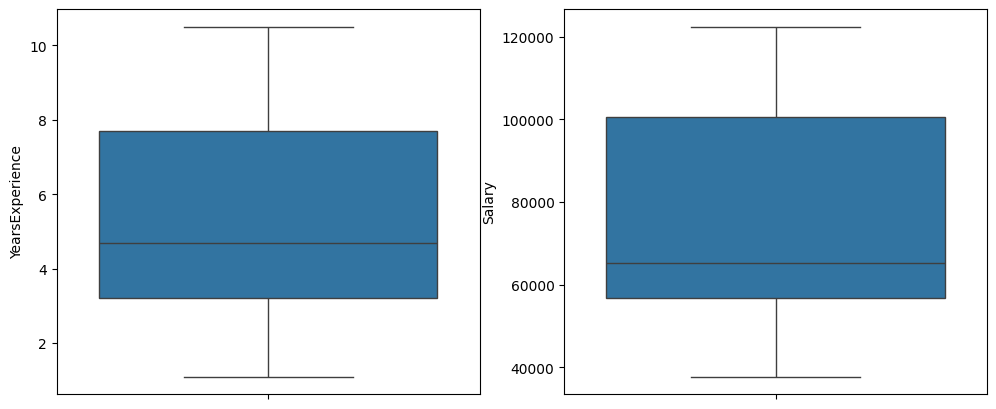

In [15]:
## Cheak Outliear
fig , axes = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(df['YearsExperience'], ax=axes[0])
sns.boxplot(df['Salary'],ax=axes[1])

## Observatioin
Dataset haven't any  outliears

<h2>Build Simple Linear Regression Model</h2>

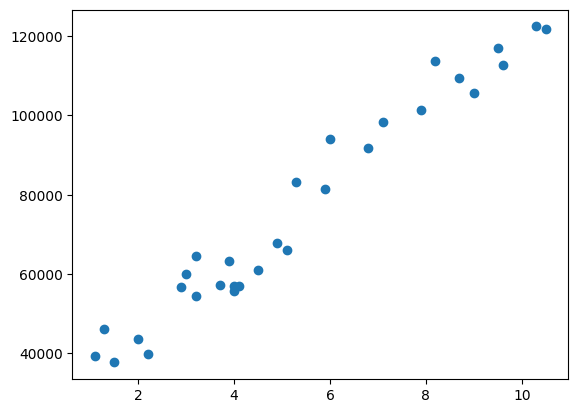

In [20]:
## scatter plot
plt.scatter(x = df['YearsExperience'], y = df['Salary'])
plt.show()

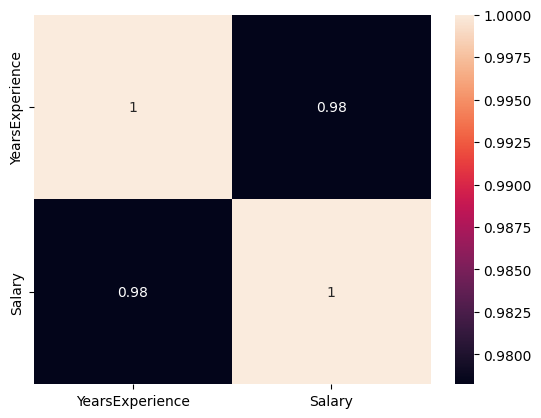

In [25]:
## correlation 
sns.heatmap(df.corr(), annot = True)
plt.show()

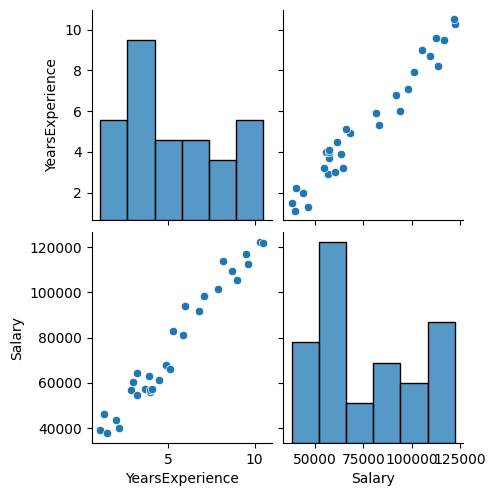

In [26]:
## pair plot
sns.pairplot(df)
plt.show()

In [32]:
## independent feature and dependent feature
x = df[['YearsExperience']] # independent feature
y = df['Salary'] # dependent feature

In [34]:
## train test split
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=42)

In [36]:
# Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [37]:
## apply simple linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=1)
model.fit(x_train,y_train)

LinearRegression(n_jobs=1)

In [40]:
## model intercept and slop
print("For every 1 year of experience, salary increases by about 27,151 - Slop : " , model.coef_)
print("With 0 years of experience, predicted salary starts at about 74,208 - Intercept : " ,  model.intercept_)

For every 1 year of experience, salary increases by about 27,151 - Slop :  [27151.53742583]
With 0 years of experience, predicted salary starts at about 74,208 - Intercept :  74207.625


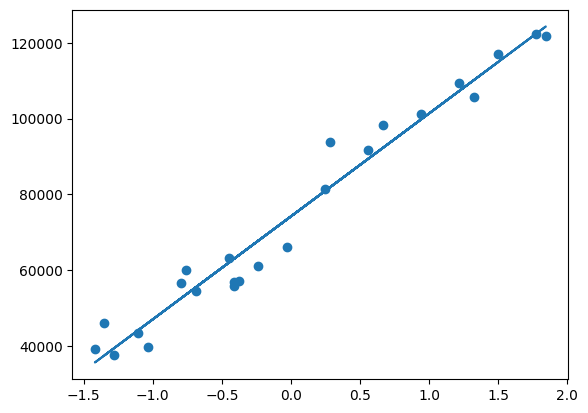

In [42]:
## plot of traning data
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))
plt.show()

In [43]:
## prediction test data
y_pred = model.predict(x_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('The average difference between the actual value and the predicted value - MSE:', mse)
print('Mean square of the difference - MAE:', mae)
print('Square root of MSE - EMSE:', rmse)

The average difference between the actual value and the predicted value - MSE: 49830096.85590834
Mean square of the difference - MAE: 6286.453830757746
Square root of MSE - EMSE: 7059.043621901506


In [46]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred) 
print("Model Performance Score : " , r2_score) 

Model Performance Score :  0.9024461774180498


In [47]:
## save model
import pickle
with open("model.pickle" , "wb") as file:
    pickle.dump(model,file)
# save scale
with open("scale.pickle" , "wb") as file:
    pickle.dump(scale,file)

_______________________